Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [196]:
import pandas as pd
import numpy as np

Read files

In [197]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57225,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1184.0,207776.0,13.979,0.080,1576.0,0.106,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57226,ZWE,Africa,Zimbabwe,2020-12-27,13077.0,114.0,107.429,349.0,8.0,4.143,879.840,7.670,7.228,23.481,0.538,0.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,208791.0,14.048,0.068,1414.0,0.095,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57227,ZWE,Africa,Zimbabwe,2020-12-28,13148.0,71.0,103.714,354.0,5.0,4.571,884.617,4.777,6.978,23.818,0.336,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,209742.0,14.112,0.064,1378.0,0.093,0.075,13.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57228,ZWE,Africa,Zimbabwe,2020-12-29,13325.0,177.0,111.571,359.0,5.0,4.714,896.526,11.909,7.507,24.154,0.336,0.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57230 entries, 0 to 57229
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56902 non-null  object 
 1   continent                           56557 non-null  object 
 2   location                            57230 non-null  object 
 3   date                                57230 non-null  object 
 4   total_cases                         56671 non-null  float64
 5   new_cases                           56665 non-null  float64
 6   new_cases_smoothed                  55709 non-null  float64
 7   total_deaths                        48418 non-null  float64
 8   new_deaths                          48417 non-null  float64
 9   new_deaths_smoothed                 55709 non-null  float64
 10  total_cases_per_million             56343 non-null  float64
 11  new_cases_per_million               56337

Convert date to number

In [199]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57225,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1184.0,207776.0,13.979,0.080,1576.0,0.106,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,26122020
57226,ZWE,Africa,Zimbabwe,2020-12-27,13077.0,114.0,107.429,349.0,8.0,4.143,879.840,7.670,7.228,23.481,0.538,0.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,208791.0,14.048,0.068,1414.0,0.095,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,27122020
57227,ZWE,Africa,Zimbabwe,2020-12-28,13148.0,71.0,103.714,354.0,5.0,4.571,884.617,4.777,6.978,23.818,0.336,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,209742.0,14.112,0.064,1378.0,0.093,0.075,13.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,28122020
57228,ZWE,Africa,Zimbabwe,2020-12-29,13325.0,177.0,111.571,359.0,5.0,4.714,896.526,11.909,7.507,24.154,0.336,0.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,29122020


Country

In [200]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Ko

In [201]:
print(len(list_country))

192


Get latest date

In [202]:
from datetime import date 
from datetime import timedelta

In [203]:
today = date.today() 
print("Today is: ", today) 

Today is:  2020-12-31


In [204]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2020-12-30


In [205]:
last_date = train.date.max()
last_date

Timestamp('2020-12-31 00:00:00')

In [206]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [207]:
from datetime import datetime

#format = '%Y-%m-%d'
#dt = datetime.strptime(last_date, format)
#print(dt)

In [208]:
yesterday = pd.Timestamp(yesterday)

In [209]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [210]:
#format = '%Y-%m-%d'
#yt = datetime.strptime(yesterday, format)
#print(yt)

In [211]:
from datetime import datetime, time, timedelta

next_day = yesterday + timedelta(days=1)
print(next_day)

2020-12-31 00:00:00


In [212]:
last_date = train[train.date == yesterday]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
310,AFG,Asia,Afghanistan,2020-12-30,51405.0,55.0,138.857,2181.0,2.0,9.143,1320.503,1.413,3.567,56.026,0.051,0.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,30122020
607,ALB,Europe,Albania,2020-12-30,57727.0,581.0,487.143,1174.0,4.0,8.143,20059.420,201.890,169.276,407.951,1.390,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,30122020
917,DZA,Africa,Algeria,2020-12-30,99311.0,323.0,394.571,2751.0,6.0,7.857,2264.735,7.366,8.998,62.735,0.137,0.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,30122020
1221,AND,Europe,Andorra,2020-12-30,7983.0,64.0,44.857,84.0,0.0,0.286,103319.744,828.318,580.562,1087.168,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,30122020
1507,AGO,Africa,Angola,2020-12-30,17433.0,62.0,71.714,405.0,2.0,1.714,530.422,1.886,2.182,12.323,0.061,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,30122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,VNM,Asia,Vietnam,2020-12-30,1456.0,2.0,5.000,35.0,0.0,0.000,14.958,0.021,0.051,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,30122020
56389,OWID_WRL,NaN,World,2020-12-30,82707976.0,756435.0,570775.857,1805002.0,15087.0,10619.857,10610.662,97.044,73.225,231.565,1.936,1.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5791550.0,0.07,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,30122020
56655,YEM,Asia,Yemen,2020-12-30,2097.0,1.0,1.429,610.0,0.0,0.571,70.308,0.034,0.048,20.452,0.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,30122020
56943,ZMB,Africa,Zambia,2020-12-30,20462.0,285.0,191.429,386.0,1.0,0.857,1113.036,15.503,10.413,20.997,0.054,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,30122020


Graphical representation

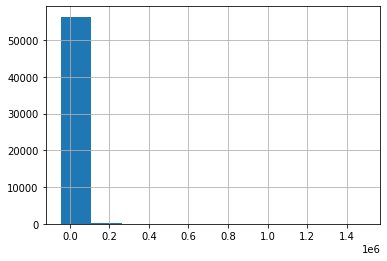

In [213]:
from matplotlib import pyplot as plt

train.new_cases.hist()

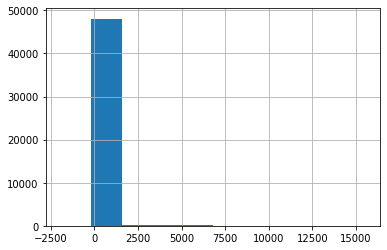

In [214]:
train.new_deaths.hist()

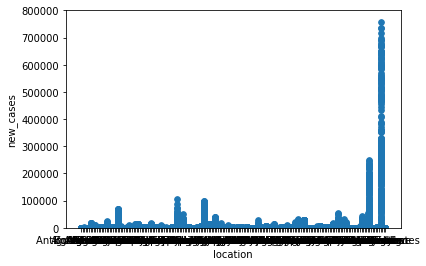

In [215]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,800000), s=32);

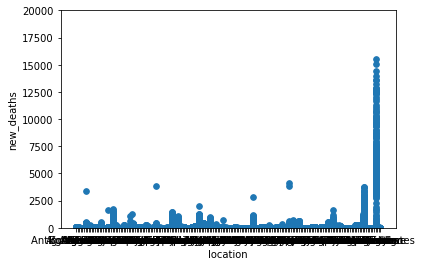

In [216]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,20000), s=32);

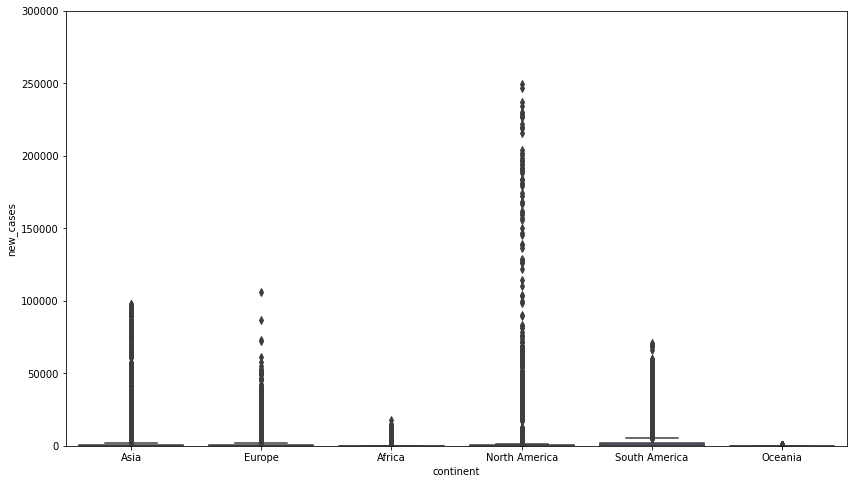

In [217]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=300000);

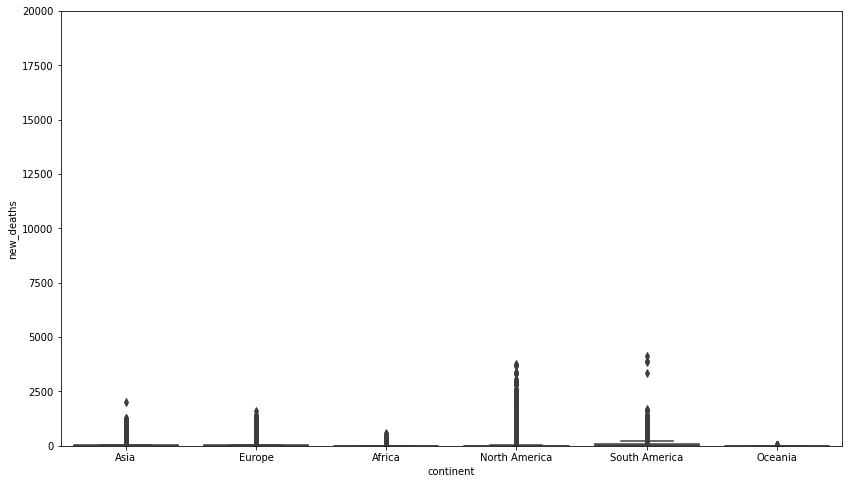

In [218]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

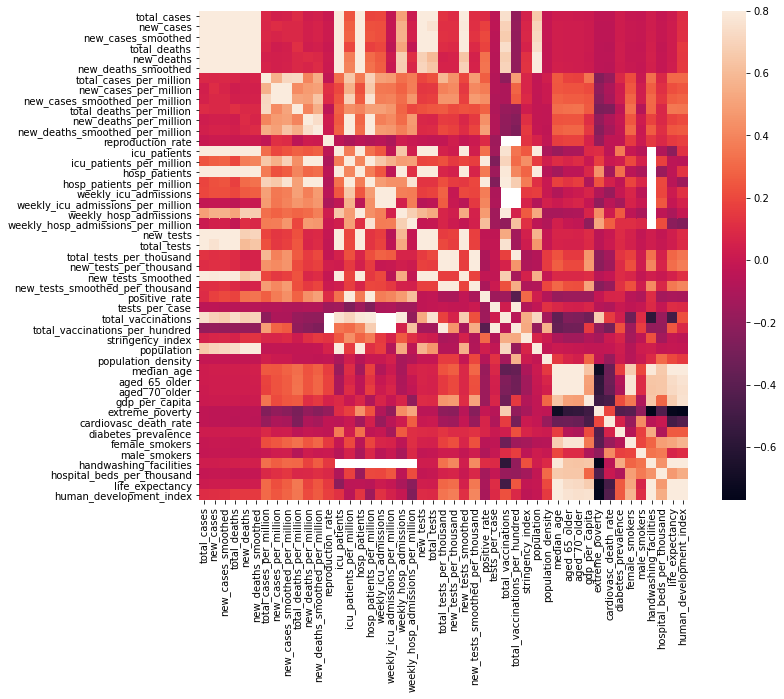

In [219]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [220]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
53797,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,31012020
53798,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,01022020
53799,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,02022020
53800,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,03022020
53801,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54127,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,1682.0,24.777,21510.0,316.855,NaN,NaN,NaN,NaN,269876.0,50509650.0,744.036,3.975,415202.0,6.116,0.087,11.5,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,26122020
54128,GBR,Europe,United Kingdom,2020-12-27,2295228.0,32493.0,35581.000,70860.0,347.0,479.571,33810.032,478.641,524.129,1043.809,5.112,7.064,NaN,1751.0,25.793,22520.0,331.733,NaN,NaN,13757.061,202.649,352702.0,50931123.0,750.245,5.196,413474.0,6.091,0.086,11.6,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,27122020
54129,GBR,Europe,United Kingdom,2020-12-28,2336688.0,41460.0,36715.714,71217.0,357.0,499.857,34420.762,610.730,540.844,1049.067,5.259,7.363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357238.0,51289157.0,755.519,5.262,402747.0,5.933,0.091,11.0,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,28122020
54130,GBR,Europe,United Kingdom,2020-12-29,2389963.0,53275.0,39050.571,71675.0,458.0,466.571,35205.534,784.771,575.237,1055.814,6.747,6.873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678

Graph of new cases

Text(0, 0.5, 'uk_new_cases')

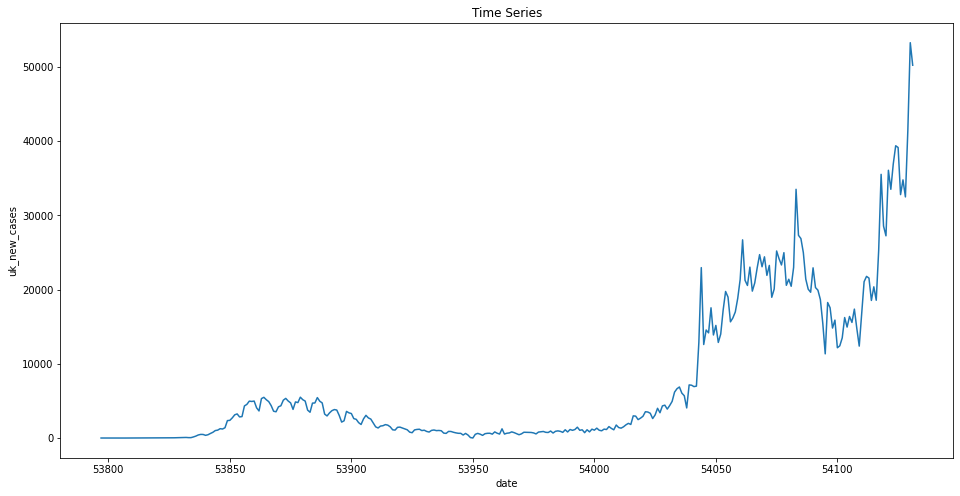

In [221]:
import matplotlib.pyplot as plt

uk_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases")

Graph of new deaths

Text(0, 0.5, 'uk_new_deaths')

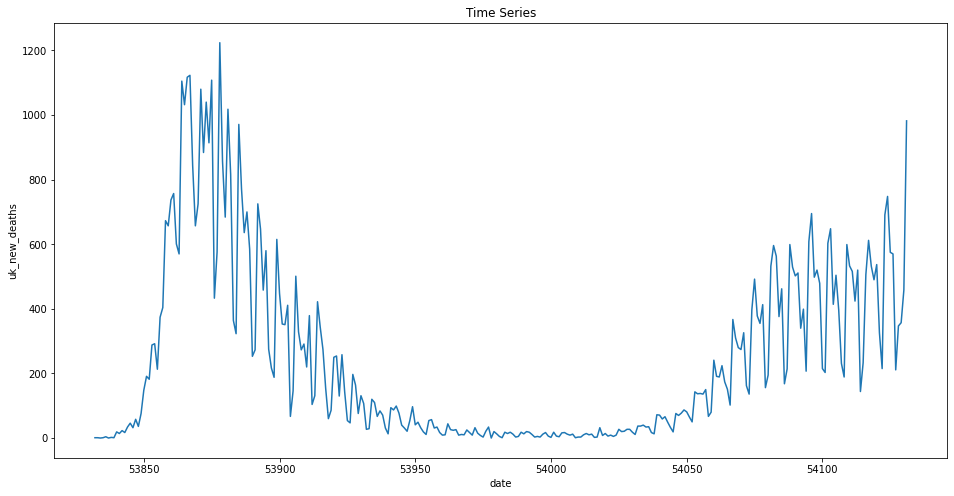

In [222]:
uk_cov19['new_deaths'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths")

Text(0, 0.5, 'uk_new_deaths_per_million')

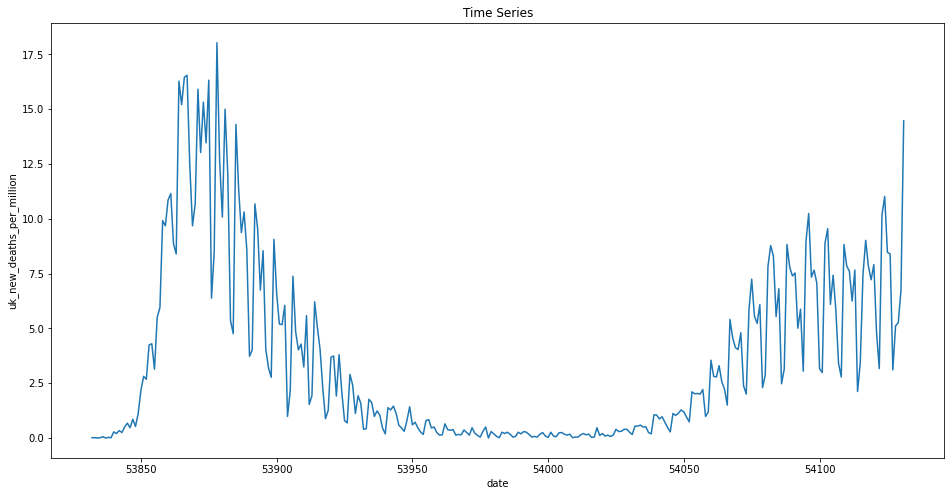

In [223]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [224]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54132,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,22012020
54133,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,23012020
54134,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,24012020
54135,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,25012020
54136,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54471,USA,North America,United States,2020-12-26,18992126.0,226597.0,189548.857,331909.0,1663.0,2250.000,57377.565,684.578,572.651,1002.738,5.024,6.798,NaN,22373.0,67.592,117344.0,354.511,NaN,NaN,NaN,NaN,243910.0,239260589.0,722.836,0.737,1019080.0,3.079,NaN,NaN,tests performed,1944585.0,0.59,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,26122020
54472,USA,North America,United States,2020-12-27,19142603.0,150477.0,184124.571,333118.0,1209.0,2207.143,57832.175,454.610,556.263,1006.391,3.653,6.668,NaN,22447.0,67.815,118720.0,358.668,1134.0,3.426,23403.0,70.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,27122020
54473,USA,North America,United States,2020-12-28,19309281.0,166678.0,180604.714,334836.0,1718.0,2210.286,58335.730,503.555,545.629,1011.581,5.190,6.678,NaN,22592.0,68.253,121235.0,366.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127143.0,0.64,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,28122020
54474,USA,North America,United States,2020-12-29,19511426.0,202145.0,181666.857,338568.0,3732.0,2257.571,58946.435,610.705,548.838,1022.856,11.275,6.820,NaN,22843.0,69.012,124693.0,376.713,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Text(0, 0.5, 'us_new_cases')

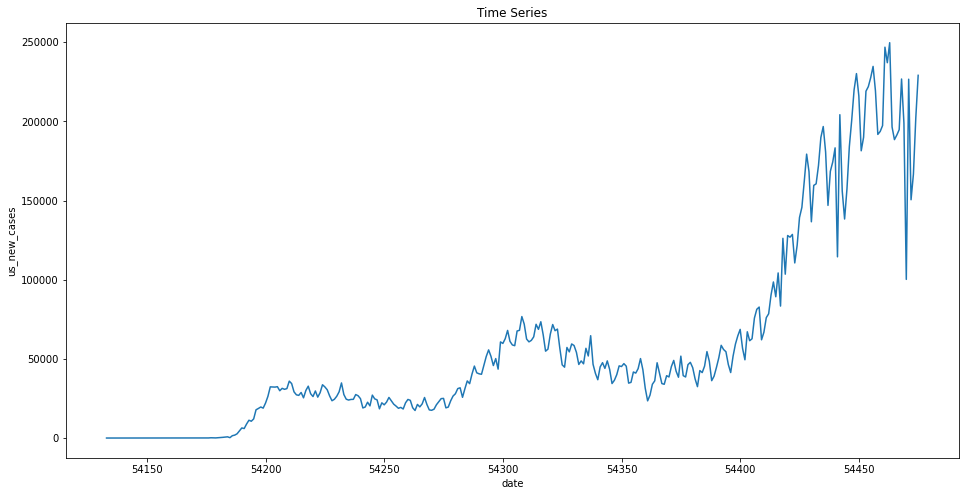

In [225]:
us_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases")

Text(0, 0.5, 'us_new_deaths')

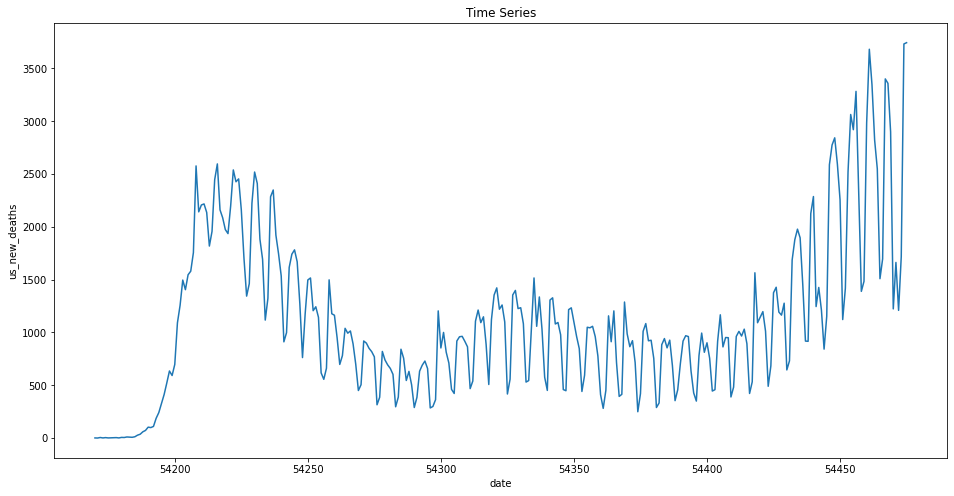

In [226]:
us_cov19['new_deaths'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths")

Text(0, 0.5, 'us_new_deaths_per_million')

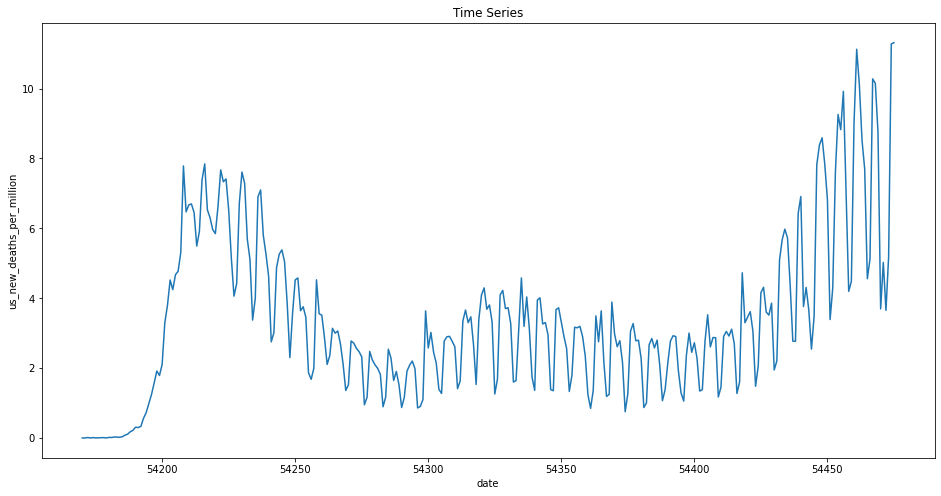

In [227]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [228]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10601,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,22012020
10602,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,23012020
10603,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,24012020
10604,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,25012020
10605,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10940,CHN,Asia,China,2020-12-26,95541.0,81.0,84.000,4770.0,0.0,1.000,66.379,0.056,0.058,3.314,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,26122020
10941,CHN,Asia,China,2020-12-27,95632.0,91.0,83.143,4771.0,1.0,1.000,66.442,0.063,0.058,3.315,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,27122020
10942,CHN,Asia,China,2020-12-28,95720.0,88.0,81.429,4775.0,4.0,1.429,66.503,0.061,0.057,3.318,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,28122020
10943,CHN,Asia,China,2020-12-29,95797.0,77.0,81.286,4777.0,2.0,1.571,66.557,0.053,0.056,3.319,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,29122020


Text(0, 0.5, 'c_new_cases')

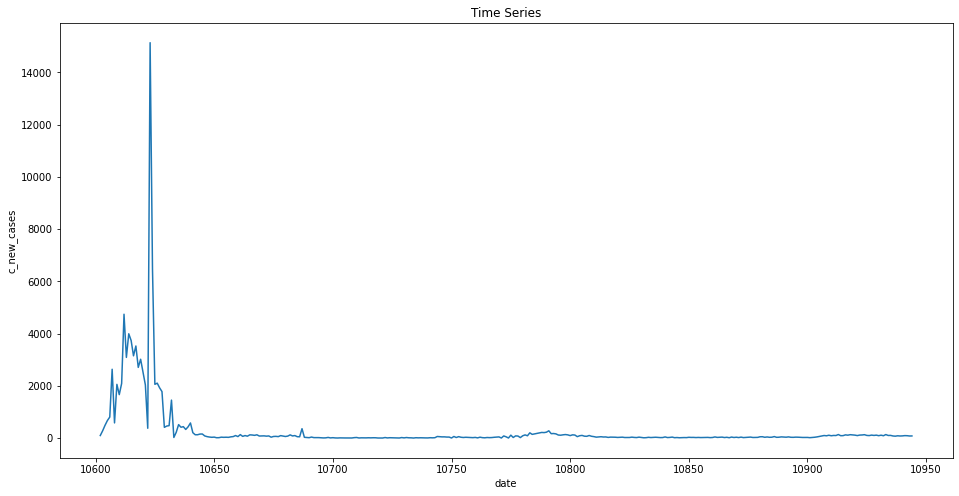

In [229]:
c_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("c_new_cases")

Text(0, 0.5, 'c_new_deaths_per_million')

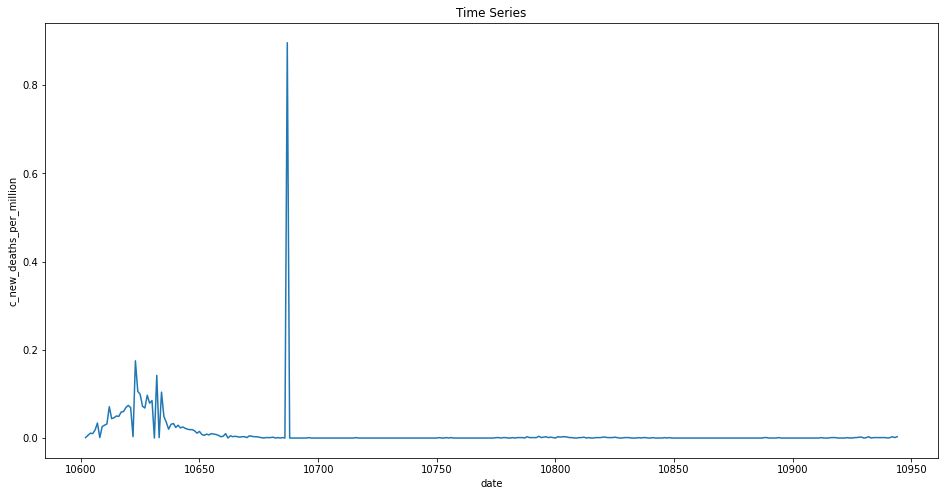

In [230]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("c_new_deaths_per_million")

South Africa

In [231]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
46989,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,07022020
46990,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,08022020
46991,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,09022020
46992,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,10022020
46993,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47312,ZAF,Africa,South Africa,2020-12-26,994911.0,11552.0,11776.286,26521.0,245.0,283.143,16775.130,194.778,198.559,447.169,4.131,4.774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37817.0,6415824.0,108.177,0.638,45064.0,0.760,0.261,3.8,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,26122020
47313,ZAF,Africa,South Africa,2020-12-27,1004413.0,9502.0,11784.429,26735.0,214.0,292.000,16935.343,160.213,198.696,450.777,3.608,4.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29494.0,6445318.0,108.674,0.497,43497.0,0.733,0.271,3.7,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,27122020
47314,ZAF,Africa,South Africa,2020-12-28,1011871.0,7458.0,11594.286,27071.0,336.0,309.143,17061.092,125.749,195.491,456.442,5.665,5.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23707.0,6469025.0,109.074,0.400,41763.0,0.704,0.278,3.6,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,28122020
47315,ZAF,Africa,South Africa,2020-12-29,1021451.0,9580.0,11605.571,27568.0,497.0,331.714,17222.619,161.528,195.681,464.822,8.380,5.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31457.0,6500482.0,109.604,0.530,40679.0,0.686,0.285,3.5,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.3

Text(0, 0.5, 'sa_new_cases')

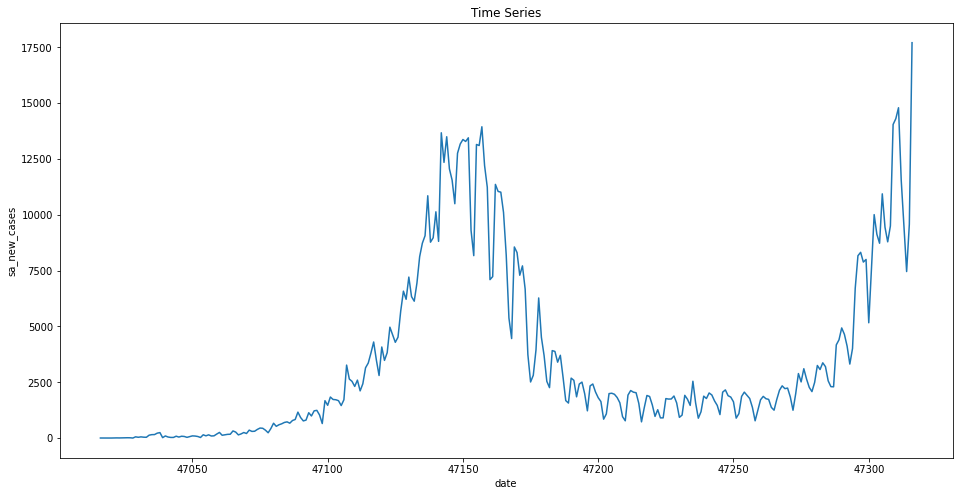

In [232]:
sa_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases")

Text(0, 0.5, 'sa_new_deaths_per_million')

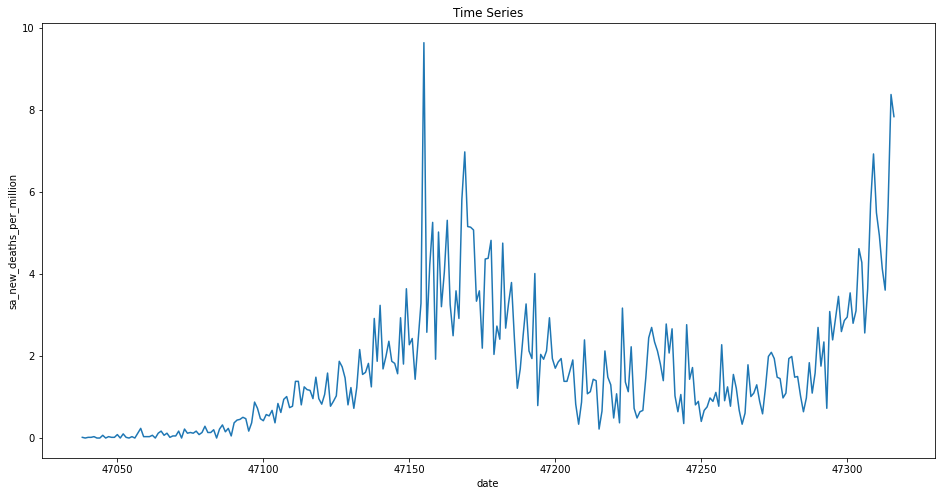

In [233]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Sweden

In [234]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
49190,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,01022020
49191,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,02022020
49192,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,03022020
49193,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,04022020
49194,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49519,SWE,Europe,Sweden,2020-12-26,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,316.0,31.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,26122020
49520,SWE,Europe,Sweden,2020-12-27,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,323.0,31.983,NaN,NaN,175.722,17.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,27122020
49521,SWE,Europe,Sweden,2020-12-28,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,28122020
49522,SWE,Europe,Sweden,2020-12-29,428533.0,32485.0,5584.857,8484.0,205.0,45.286,42432.077,3216.569,552.996,840.061,20.298,4.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,29122020


Text(0, 0.5, 's_new_cases')

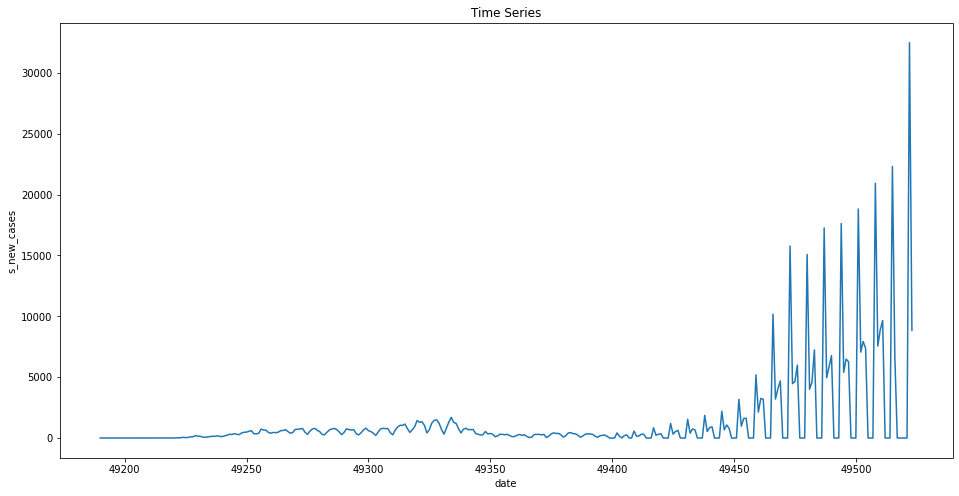

In [235]:
s_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("s_new_cases")

Text(0, 0.5, 's_new_deaths_per_million')

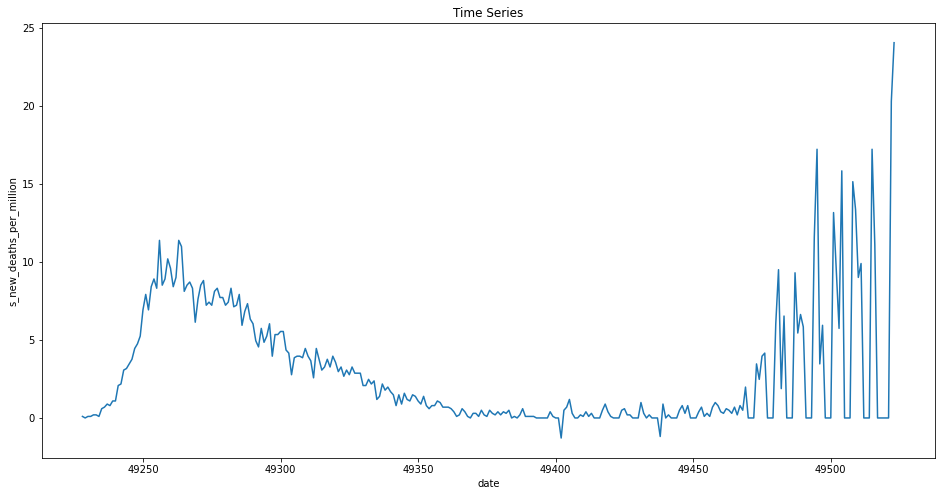

In [236]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("s_new_deaths_per_million")

Compare new cases per million to new deaths per million

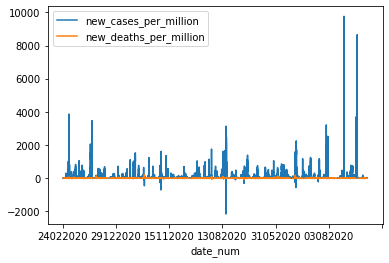

In [237]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

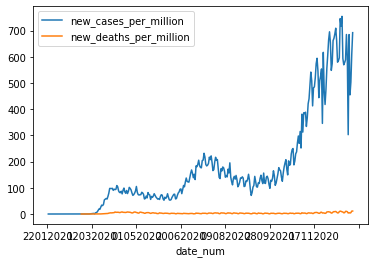

In [238]:
us_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

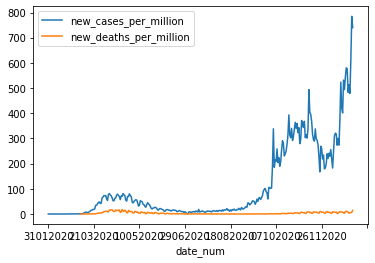

In [239]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [240]:
revised_uk_cov19 = uk_cov19[7:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
53804,GBR,Europe,United Kingdom,2020-02-07,9.0,0.0,1.000,NaN,NaN,0.000,0.133,0.000,0.015,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,07022020
53805,GBR,Europe,United Kingdom,2020-02-08,13.0,4.0,1.571,NaN,NaN,0.000,0.191,0.059,0.023,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,08022020
53806,GBR,Europe,United Kingdom,2020-02-09,14.0,1.0,1.714,NaN,NaN,0.000,0.206,0.015,0.025,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,09022020
53807,GBR,Europe,United Kingdom,2020-02-10,14.0,0.0,0.857,NaN,NaN,0.000,0.206,0.000,0.013,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,10022020
53808,GBR,Europe,United Kingdom,2020-02-11,15.0,1.0,1.000,NaN,NaN,0.000,0.221,0.015,0.015,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54127,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,1682.0,24.777,21510.0,316.855,NaN,NaN,NaN,NaN,269876.0,50509650.0,744.036,3.975,415202.0,6.116,0.087,11.5,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,26122020
54128,GBR,Europe,United Kingdom,2020-12-27,2295228.0,32493.0,35581.000,70860.0,347.0,479.571,33810.032,478.641,524.129,1043.809,5.112,7.064,NaN,1751.0,25.793,22520.0,331.733,NaN,NaN,13757.061,202.649,352702.0,50931123.0,750.245,5.196,413474.0,6.091,0.086,11.6,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,27122020
54129,GBR,Europe,United Kingdom,2020-12-28,2336688.0,41460.0,36715.714,71217.0,357.0,499.857,34420.762,610.730,540.844,1049.067,5.259,7.363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357238.0,51289157.0,755.519,5.262,402747.0,5.933,0.091,11.0,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,28122020
54130,GBR,Europe,United Kingdom,2020-12-29,2389963.0,53275.0,39050.571,71675.0,458.0,466.571,35205.534,784.771,575.237,1055.814,6.747,6.873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [241]:
revised_us_cov19 = us_cov19[16:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54148,USA,North America,United States,2020-02-07,12.0,0.0,0.571,NaN,NaN,0.000,0.036,0.000,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,07022020
54149,USA,North America,United States,2020-02-08,12.0,0.0,0.571,NaN,NaN,0.000,0.036,0.000,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,08022020
54150,USA,North America,United States,2020-02-09,12.0,0.0,0.571,NaN,NaN,0.000,0.036,0.000,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,09022020
54151,USA,North America,United States,2020-02-10,12.0,0.0,0.143,NaN,NaN,0.000,0.036,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,10022020
54152,USA,North America,United States,2020-02-11,13.0,1.0,0.286,NaN,NaN,0.000,0.039,0.003,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54471,USA,North America,United States,2020-12-26,18992126.0,226597.0,189548.857,331909.0,1663.0,2250.000,57377.565,684.578,572.651,1002.738,5.024,6.798,NaN,22373.0,67.592,117344.0,354.511,NaN,NaN,NaN,NaN,243910.0,239260589.0,722.836,0.737,1019080.0,3.079,NaN,NaN,tests performed,1944585.0,0.59,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,26122020
54472,USA,North America,United States,2020-12-27,19142603.0,150477.0,184124.571,333118.0,1209.0,2207.143,57832.175,454.610,556.263,1006.391,3.653,6.668,NaN,22447.0,67.815,118720.0,358.668,1134.0,3.426,23403.0,70.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,27122020
54473,USA,North America,United States,2020-12-28,19309281.0,166678.0,180604.714,334836.0,1718.0,2210.286,58335.730,503.555,545.629,1011.581,5.190,6.678,NaN,22592.0,68.253,121235.0,366.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127143.0,0.64,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,28122020
54474,USA,North America,United States,2020-12-29,19511426.0,202145.0,181666.857,338568.0,3732.0,2257.571,58946.435,610.705,548.838,1022.856,11.275,6.820,NaN,22843.0

In [242]:
revised_c_cov19 = c_cov19[16:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10617,CHN,Asia,China,2020-02-07,34110.0,3523.0,3472.571,718.0,85.0,72.143,23.699,2.448,2.413,0.499,0.059,0.050,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.31,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,07022020
10618,CHN,Asia,China,2020-02-08,36814.0,2704.0,3560.429,805.0,87.0,78.000,25.577,1.879,2.474,0.559,0.060,0.054,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.31,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,08022020
10619,CHN,Asia,China,2020-02-09,39829.0,3015.0,3314.143,905.0,100.0,77.714,27.672,2.095,2.303,0.629,0.069,0.054,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.31,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,09022020
10620,CHN,Asia,China,2020-02-10,42354.0,2525.0,3234.000,1012.0,107.0,83.857,29.426,1.754,2.247,0.703,0.074,0.058,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.46,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,10022020
10621,CHN,Asia,China,2020-02-11,44386.0,2032.0,2954.143,1112.0,100.0,88.714,30.838,1.412,2.052,0.773,0.069,0.062,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.46,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10940,CHN,Asia,China,2020-12-26,95541.0,81.0,84.000,4770.0,0.0,1.000,66.379,0.056,0.058,3.314,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,26122020
10941,CHN,Asia,China,2020-12-27,95632.0,91.0,83.143,4771.0,1.0,1.000,66.442,0.063,0.058,3.315,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,27122020
10942,CHN,Asia,China,2020-12-28,95720.0,88.0,81.429,4775.0,4.0,1.429,66.503,0.061,0.057,3.318,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,28122020
10943,CHN,Asia,China,2020-12-29,95797.0,77.0,81.286,4777.0,2.0,1.571,66.557,0.053,0.056,3.319,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,29122020


In [243]:
revised_s_cov19 = s_cov19[6:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
49196,SWE,Europe,Sweden,2020-02-07,1.0,0.0,0.143,NaN,NaN,0.000,0.099,0.000,0.014,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,07022020
49197,SWE,Europe,Sweden,2020-02-08,1.0,0.0,0.000,NaN,NaN,0.000,0.099,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,08022020
49198,SWE,Europe,Sweden,2020-02-09,1.0,0.0,0.000,NaN,NaN,0.000,0.099,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,09022020
49199,SWE,Europe,Sweden,2020-02-10,1.0,0.0,0.000,NaN,NaN,0.000,0.099,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,10022020
49200,SWE,Europe,Sweden,2020-02-11,1.0,0.0,0.000,NaN,NaN,0.000,0.099,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49519,SWE,Europe,Sweden,2020-12-26,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,316.0,31.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,26122020
49520,SWE,Europe,Sweden,2020-12-27,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,323.0,31.983,NaN,NaN,175.722,17.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,27122020
49521,SWE,Europe,Sweden,2020-12-28,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,28122020
49522,SWE,Europe,Sweden,2020-12-29,428533.0,32485.0,5584.857,8484.0,205.0,45.286,42432.077,3216.569,552.996,840.061,20.298,4.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,29122020


In [244]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((328,), (328,), (328,), (328,))

In [245]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [246]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [247]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [248]:
sa_new_case_per_million = sa_cov19.new_cases_per_million
sa_new_death_per_million = sa_cov19.new_deaths_per_million

In [249]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [250]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
53804,2020-02-07,0.000,NaN
53805,2020-02-08,0.059,NaN
53806,2020-02-09,0.015,NaN
53807,2020-02-10,0.000,NaN
53808,2020-02-11,0.015,NaN
...,...,...,...
54127,2020-12-26,512.447,3.108
54128,2020-12-27,478.641,5.112
54129,2020-12-28,610.730,5.259
54130,2020-12-29,784.771,6.747


In [251]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
54148,2020-02-07,0.000,NaN
54149,2020-02-08,0.000,NaN
54150,2020-02-09,0.000,NaN
54151,2020-02-10,0.000,NaN
54152,2020-02-11,0.003,NaN
...,...,...,...
54471,2020-12-26,684.578,5.024
54472,2020-12-27,454.610,3.653
54473,2020-12-28,503.555,5.190
54474,2020-12-29,610.705,11.275


In [252]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
10617,2020-02-07,2.448,0.059
10618,2020-02-08,1.879,0.060
10619,2020-02-09,2.095,0.069
10620,2020-02-10,1.754,0.074
10621,2020-02-11,1.412,0.069
...,...,...,...
10940,2020-12-26,0.056,0.000
10941,2020-12-27,0.063,0.001
10942,2020-12-28,0.061,0.003
10943,2020-12-29,0.053,0.001


In [253]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
46989,2020-02-07,NaN,NaN
46990,2020-02-08,NaN,NaN
46991,2020-02-09,NaN,NaN
46992,2020-02-10,NaN,NaN
46993,2020-02-11,NaN,NaN
...,...,...,...
47312,2020-12-26,194.778,4.131
47313,2020-12-27,160.213,3.608
47314,2020-12-28,125.749,5.665
47315,2020-12-29,161.528,8.380


In [254]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
49196,2020-02-07,0.000,NaN
49197,2020-02-08,0.000,NaN
49198,2020-02-09,0.000,NaN
49199,2020-02-10,0.000,NaN
49200,2020-02-11,0.000,NaN
...,...,...,...
49519,2020-12-26,0.000,0.000
49520,2020-12-27,0.000,0.000
49521,2020-12-28,0.000,0.000
49522,2020-12-29,3216.569,20.298


In [255]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date").merge(s_compare, on="date")
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million
0,2020-02-07,0.000,NaN,0.000,NaN,2.448,0.059,NaN,NaN,0.000,NaN
1,2020-02-08,0.059,NaN,0.000,NaN,1.879,0.060,NaN,NaN,0.000,NaN
2,2020-02-09,0.015,NaN,0.000,NaN,2.095,0.069,NaN,NaN,0.000,NaN
3,2020-02-10,0.000,NaN,0.000,NaN,1.754,0.074,NaN,NaN,0.000,NaN
4,2020-02-11,0.015,NaN,0.003,NaN,1.412,0.069,NaN,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
323,2020-12-26,512.447,3.108,684.578,5.024,0.056,0.000,194.778,4.131,0.000,0.000
324,2020-12-27,478.641,5.112,454.610,3.653,0.063,0.001,160.213,3.608,0.000,0.000
325,2020-12-28,610.730,5.259,503.555,5.190,0.061,0.003,125.749,5.665,0.000,0.000
326,2020-12-29,784.771,6.747,610.705,11.275,0.053,0.001,161.528,8.380,3216.569,20.298


In [256]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million    28
us_new_cse_pr_million     0
us_new_dth_pr_million    22
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million    27
sa_new_dth_pr_million    49
s_new_cse_pr_million      0
s_new_dth_pr_million     32
dtype: int64

In [257]:
compare.fillna(0,inplace=True)

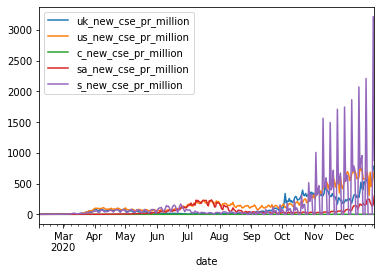

In [258]:
compare.plot(x="date", y=["uk_new_cse_pr_million", "us_new_cse_pr_million", "c_new_cse_pr_million", "sa_new_cse_pr_million", "s_new_cse_pr_million"])

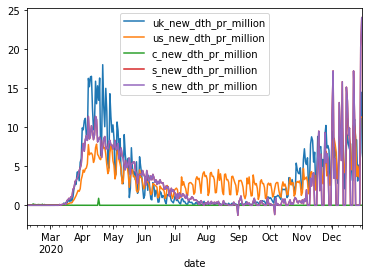

In [259]:
compare.plot(x="date", y=["uk_new_dth_pr_million", "us_new_dth_pr_million", "c_new_dth_pr_million", "s_new_dth_pr_million", "s_new_dth_pr_million"])

Check for null values

In [260]:
train.isnull().sum()

iso_code                                328
continent                               673
location                                  0
date                                      0
total_cases                             559
new_cases                               565
new_cases_smoothed                     1521
total_deaths                           8812
new_deaths                             8813
new_deaths_smoothed                    1521
total_cases_per_million                 887
new_cases_per_million                   893
new_cases_smoothed_per_million         1844
total_deaths_per_million               9127
new_deaths_per_million                 9128
new_deaths_smoothed_per_million        1844
reproduction_rate                     14727
icu_patients                          51158
icu_patients_per_million              51158
hosp_patients                         50399
hosp_patients_per_million             50399
weekly_icu_admissions                 56687
weekly_icu_admissions_per_millio

Impute missing values

In [261]:
train = train.drop(['date'], axis=1)

In [262]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [263]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [264]:
train.fillna(0,inplace=True)

Ordinal encoder

In [265]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [266]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [267]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [268]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57225,0.0
57226,8.0
57227,5.0
57228,5.0


In [269]:
X

array([[-0.41485886, -1.70977306, -0.10968555, ..., -0.70657089,
        -0.88787513,  0.90490396],
       [-0.41485886, -1.70977306, -0.10972352, ..., -0.70657089,
        -0.88787513,  1.0185448 ],
       [-0.41485886, -1.70977306, -0.10972352, ..., -0.70657089,
        -0.88787513,  1.13218565],
       ...,
       [-1.02802413,  1.733461  , -0.10702822, ..., -1.01975237,
        -0.71186453,  1.37083142],
       [-1.02802413,  1.733461  , -0.10300424, ..., -1.01975237,
        -0.71186453,  1.48447227],
       [-1.02802413,  1.733461  , -0.09833492, ..., -1.01975237,
        -0.71186453,  1.59811311]])

Split training file up for training and validation

In [270]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((51507, 40), (5723, 40), (51507, 1), (5723, 1))

Select model

In [271]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9950251826380235


Predict on validation set

In [272]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.8827699542726953
0.9964814739809111


(None, None)

In [273]:
y_val

,new_deaths
46707,0.0
24470,0.0
44637,3.0
42705,0.0
46258,0.0
...,...
40975,7.0
11422,0.0
585,14.0
16607,1.0


In [274]:
y_train.values

array([[  1.],
       [ 28.],
       [  0.],
       ...,
       [122.],
       [  3.],
       [  0.]])

In [275]:
y_pred

array([ 0, 10,  2, ..., 12,  0,  2])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


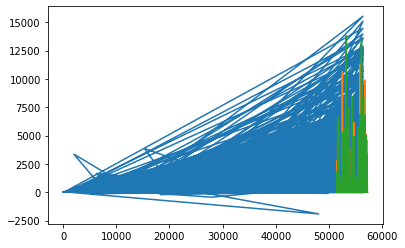

In [276]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [277]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,0.0,0
1,0.0,10
2,3.0,2
3,0.0,0
4,0.0,9
...,...,...
5718,7.0,7
5719,0.0,0
5720,14.0,12
5721,1.0,0


Create test dataset

In [278]:
test = last_date.copy()
test.date = next_day
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
310,AFG,Asia,Afghanistan,2020-12-31,51405.0,55.0,138.857,2181.0,2.0,9.143,1320.503,1.413,3.567,56.026,0.051,0.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,30122020
607,ALB,Europe,Albania,2020-12-31,57727.0,581.0,487.143,1174.0,4.0,8.143,20059.420,201.890,169.276,407.951,1.390,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,30122020
917,DZA,Africa,Algeria,2020-12-31,99311.0,323.0,394.571,2751.0,6.0,7.857,2264.735,7.366,8.998,62.735,0.137,0.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,30122020
1221,AND,Europe,Andorra,2020-12-31,7983.0,64.0,44.857,84.0,0.0,0.286,103319.744,828.318,580.562,1087.168,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,30122020
1507,AGO,Africa,Angola,2020-12-31,17433.0,62.0,71.714,405.0,2.0,1.714,530.422,1.886,2.182,12.323,0.061,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,30122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,VNM,Asia,Vietnam,2020-12-31,1456.0,2.0,5.000,35.0,0.0,0.000,14.958,0.021,0.051,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,30122020
56389,OWID_WRL,NaN,World,2020-12-31,82707976.0,756435.0,570775.857,1805002.0,15087.0,10619.857,10610.662,97.044,73.225,231.565,1.936,1.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5791550.0,0.07,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,30122020
56655,YEM,Asia,Yemen,2020-12-31,2097.0,1.0,1.429,610.0,0.0,0.571,70.308,0.034,0.048,20.452,0.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,30122020
56943,ZMB,Africa,Zambia,2020-12-31,20462.0,285.0,191.429,386.0,1.0,0.857,1113.036,15.503,10.413,20.997,0.054,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,30122020


Convert date to number

In [279]:
import datetime 

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
310,AFG,Asia,Afghanistan,2020-12-31,51405.0,55.0,138.857,2181.0,2.0,9.143,1320.503,1.413,3.567,56.026,0.051,0.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,31122020
607,ALB,Europe,Albania,2020-12-31,57727.0,581.0,487.143,1174.0,4.0,8.143,20059.420,201.890,169.276,407.951,1.390,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,31122020
917,DZA,Africa,Algeria,2020-12-31,99311.0,323.0,394.571,2751.0,6.0,7.857,2264.735,7.366,8.998,62.735,0.137,0.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,31122020
1221,AND,Europe,Andorra,2020-12-31,7983.0,64.0,44.857,84.0,0.0,0.286,103319.744,828.318,580.562,1087.168,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,31122020
1507,AGO,Africa,Angola,2020-12-31,17433.0,62.0,71.714,405.0,2.0,1.714,530.422,1.886,2.182,12.323,0.061,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,31122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,VNM,Asia,Vietnam,2020-12-31,1456.0,2.0,5.000,35.0,0.0,0.000,14.958,0.021,0.051,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,31122020
56389,OWID_WRL,NaN,World,2020-12-31,82707976.0,756435.0,570775.857,1805002.0,15087.0,10619.857,10610.662,97.044,73.225,231.565,1.936,1.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5791550.0,0.07,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,31122020
56655,YEM,Asia,Yemen,2020-12-31,2097.0,1.0,1.429,610.0,0.0,0.571,70.308,0.034,0.048,20.452,0.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,31122020
56943,ZMB,Africa,Zambia,2020-12-31,20462.0,285.0,191.429,386.0,1.0,0.857,1113.036,15.503,10.413,20.997,0.054,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,31122020


Check for null values

In [280]:
test.isnull().sum()

iso_code                                1
continent                               2
location                                0
date                                    0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                           14
new_deaths                             14
new_deaths_smoothed                     0
total_cases_per_million                 1
new_cases_per_million                   1
new_cases_smoothed_per_million          1
total_deaths_per_million               15
new_deaths_per_million                 15
new_deaths_smoothed_per_million         1
reproduction_rate                     191
icu_patients                          189
icu_patients_per_million              189
hosp_patients                         189
hosp_patients_per_million             189
weekly_icu_admissions                 191
weekly_icu_admissions_per_million     191
weekly_hosp_admissions            

Impute missing values

In [281]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [282]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [283]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [284]:
test.fillna(0,inplace=True)

In [285]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
310,AFG,Asia,Afghanistan,51405.0,55.0,138.857,2181.0,2.0,9.143,1320.503,1.413,3.567,56.026,0.051,0.235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498,31122020
607,ALB,Europe,Albania,57727.0,581.0,487.143,1174.0,4.0,8.143,20059.420,201.890,169.276,407.951,1.390,2.830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785,31122020
917,DZA,Africa,Algeria,99311.0,323.0,394.571,2751.0,6.0,7.857,2264.735,7.366,8.998,62.735,0.137,0.179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,31122020
1221,AND,Europe,Andorra,7983.0,64.0,44.857,84.0,0.0,0.286,103319.744,828.318,580.562,1087.168,0.000,3.698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858,31122020
1507,AGO,Africa,Angola,17433.0,62.0,71.714,405.0,2.0,1.714,530.422,1.886,2.182,12.323,0.061,0.052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581,31122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,VNM,Asia,Vietnam,1456.0,2.0,5.000,35.0,0.0,0.000,14.958,0.021,0.051,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,31122020
56389,OWID_WRL,Not Listed,World,82707976.0,756435.0,570775.857,1805002.0,15087.0,10619.857,10610.662,97.044,73.225,231.565,1.936,1.362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,5791550.0,0.07,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,31122020
56655,YEM,Asia,Yemen,2097.0,1.0,1.429,610.0,0.0,0.571,70.308,0.034,0.048,20.452,0.000,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,31122020
56943,ZMB,Africa,Zambia,20462.0,285.0,191.429,386.0,1.0,0.857,1113.036,15.503,10.413,20.997,0.054,0.047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,31122020


Ordinal encoder

In [286]:
test_country = test.location
test_country

310      Afghanistan
607          Albania
917          Algeria
1221         Andorra
1507          Angola
            ...     
56045        Vietnam
56389          World
56655          Yemen
56943         Zambia
57229       Zimbabwe
Name: location, Length: 191, dtype: object

In [287]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [288]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [289]:
X_test = scaler.transform(X_test)

In [290]:
X_test

array([[-0.41485886, -1.70977306, -0.10763561, ..., -0.70657089,
        -0.88787513,  1.71175396],
       [ 0.19830641, -1.69174566, -0.0876676 , ...,  0.58178648,
         0.47739625,  1.71175396],
       [-1.02802413, -1.67371825, -0.09746179, ...,  0.4233204 ,
         0.32992792,  1.71175396],
       ...,
       [-0.41485886,  1.67937879, -0.10968555, ..., -0.58561157,
        -1.10669912,  1.71175396],
       [-1.02802413,  1.69740619, -0.09890435, ..., -0.79471178,
        -0.45974125,  1.71175396],
       [-1.02802413,  1.7154336 , -0.09833492, ..., -1.01975237,
        -0.71186453,  1.71175396]])

Predict on test set

In [291]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(191,)

Put Predictions in dataframe

In [292]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2020-12-31,9
1,Albania,2020-12-31,4
2,Algeria,2020-12-31,2
3,Andorra,2020-12-31,4
4,Angola,2020-12-31,5
...,...,...,...
186,Vietnam,2020-12-31,32
187,World,2020-12-31,13394
188,Yemen,2020-12-31,16
189,Zambia,2020-12-31,0
